In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11111111)

In [2]:
# Mean 0 and standard deviation 0.01
mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [3]:
# Correlation  Mean 0 and standard deviation 0.01
rho = 0.01 * np.random.randn()
rho

0.0071295474522512226

In [4]:
# Standard deviation (Needs to be > 0, use exp)
sigmas = np.exp(np.random.randn(2))
sigmas

array([2.83423006, 0.50425457])

In [5]:
# Covariance matrix
cov = np.diag(sigmas**2)
cov

array([[8.03286002, 0.        ],
       [0.        , 0.25427267]])

In [6]:
# Covariance sigma12
sigma12 = sigmas[0] * sigmas[1] * rho
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[8.03286002, 0.01018936],
       [0.01018936, 0.25427267]])

In [7]:
# Generate weights that sum to 1
def softmax(w):
  a = np.exp(w)
  return a / a.sum()

In [10]:
# Generate N portfolios
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    w = softmax(np.random.randn(2))
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

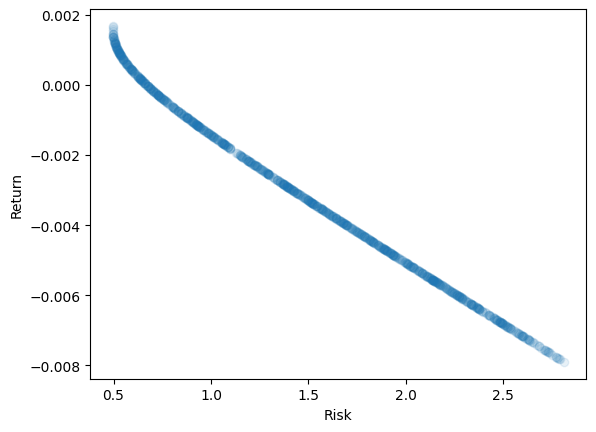

In [11]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [12]:
# Generate 2 portfolio assets
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    x = np.random.random()
    w = np.array([x, 1-x]) # positive only
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

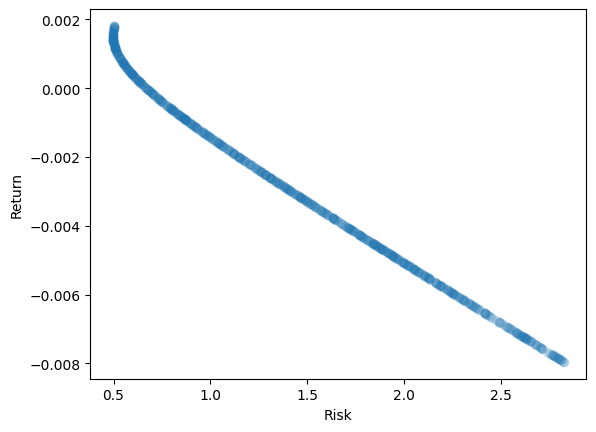

In [13]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [14]:
# Generate 2 portfolio assets with short-selling
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    x = np.random.random() - 0.5
    w = np.array([x, 1-x]) # positive only
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

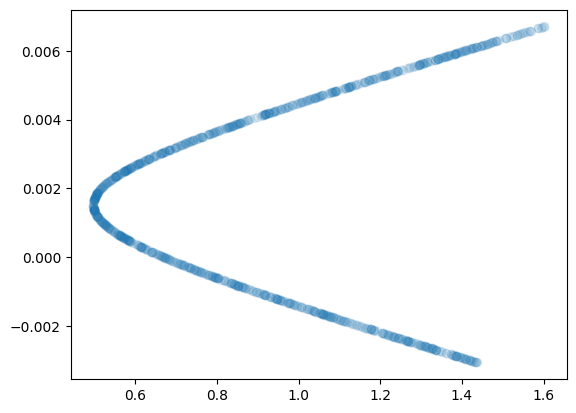

In [15]:
plt.scatter(risks, returns, alpha=0.1);

<span style="font-size:20pt; font-weight:600;">3-asset portfolio</span>

In [16]:
# Mean 0 and standard deviation 0.01
n_assets=3
mean_return = 0.01 * np.random.randn(n_assets)
mean_return

array([-0.00064955, -0.00479921,  0.00296115])

In [17]:
# Standard deviation (Needs to be > 0, use exp)
sigmas = np.exp(np.random.randn(n_assets))
sigmas

array([1.06431534, 0.40268065, 1.58583079])

In [18]:
# Correlations Mean 0 and standard deviation 0.01. 3 values for asset 1 to 2, asset 1 to 3 and and asset 2 to 3
rhos = 0.01 * np.random.randn(n_assets)
rhos

array([-0.00528151,  0.01889692, -0.00046375])

In [19]:
cov = np.array([
  [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[2]],
  [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
  [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
])
cov

array([[ 1.13276715e+00, -2.26354366e-03,  3.18946690e-02],
       [-2.26354366e-03,  1.62151710e-01, -2.96140881e-04],
       [ 3.18946690e-02, -2.96140881e-04,  2.51485929e+00]])

In [20]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x1, x2 = np.random.random(2) - 0.5
  w = np.array([x1, x2, 1 - x1 - x2]) # short-selling allowed
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

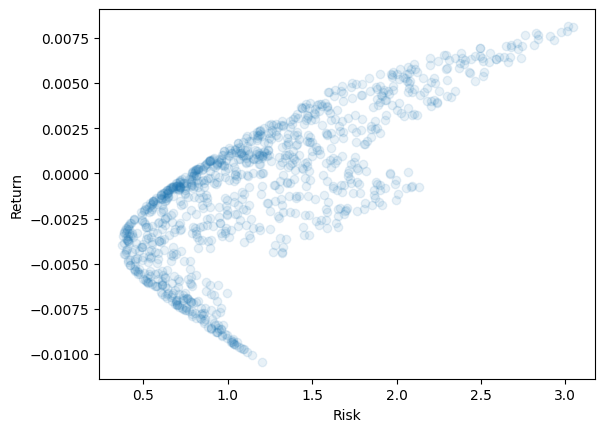

In [21]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");